# Agrupamiento. Clustering - Clustering

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix
from pyclustertend import hopkins
from sklearn.preprocessing import scale
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer   # Import the KElbowVisualizer method 
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal as mvn
import scipy.stats as scs
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import DBSCAN
from fcmeans import FCM
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
data = pd.read_csv("dfMedidas_CLUSscale.csv")
df = data.copy()
df.head()

,Lluvia,Lluvia_SN,T_MAX,T_MIN,Viento_MAX,Viento_MED,SO2,CO,NO,NO2,PM2.5,PM10,O3,TOL,BEN,EBE,TCH
0,-0.238728,-0.486455,-1.268221,-1.786491,-1.503414,-1.890046,3.018962,3.420467,3.225965,2.789227,2.720906,1.447341,-1.574298,1.271792,3.006923,1.552463,4.579220
1,-0.238728,-0.486455,-1.068542,-1.757353,-1.760961,-1.890046,3.560829,3.539864,3.861533,3.163613,1.499340,0.715349,-1.694888,1.909455,3.090306,2.083052,4.039004
2,-0.238728,-0.486455,-1.157288,-1.495109,-1.503414,-1.275008,2.852234,2.823480,3.070711,2.523948,1.180670,0.263695,-1.669649,1.683616,2.485784,1.496189,4.390144
3,-0.238728,-0.486455,-0.857769,-1.495109,-1.675112,-1.685033,3.060644,3.301069,2.732308,2.541063,1.021335,0.030081,-1.551863,1.491727,2.694240,1.938346,3.309712
4,-0.238728,-0.486455,-1.090729,-1.407695,-1.074170,-1.069996,2.310367,2.584685,2.692282,2.230857,1.074447,0.193611,-1.605147,1.381021,2.207843,1.536385,3.822917


## Agrupación Jerárquica - Hierarchical Grouping

In [6]:
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")
hc_ward = linkage(df, "ward")

# Ward method is actually a method that tries to minimize the variance within each cluster

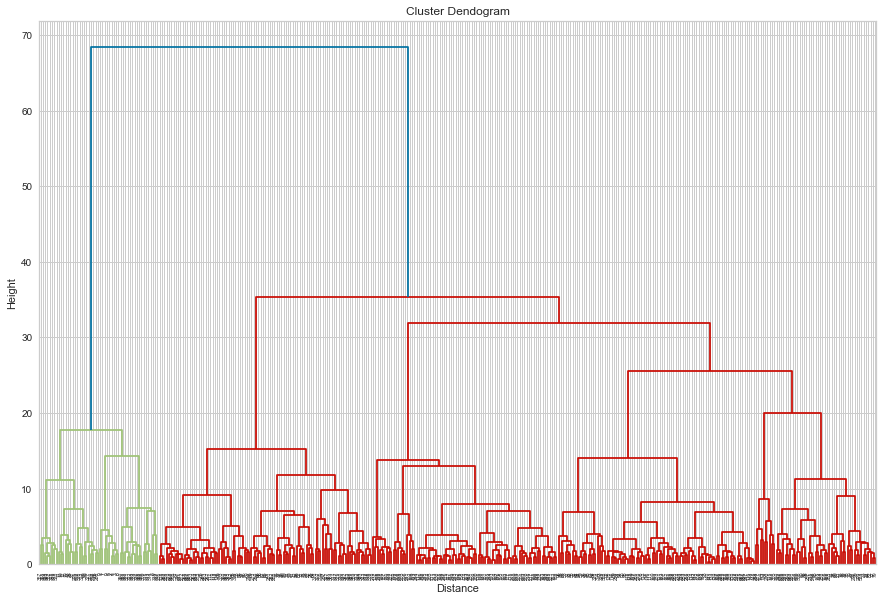

In [7]:
plt.figure(figsize=(15, 10))
plt.title('Cluster Dendogram')
plt.xlabel('Distance')
plt.ylabel('Height')
dendrogram(
    hc_ward,
);

# distancia <- dist(dfMedidas_CLUSscale, method = "euclidean") #matriz de distancias euclídeas
# clus_hc <- hclust(distancia, method="ward") 
# plot(clus_hc) 

In [8]:
# X = df.iloc[:,[3, 4]].values

In [24]:
dist = distance_matrix(df, df)
h1 = hierarchy.linkage(dist, 'complete')

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


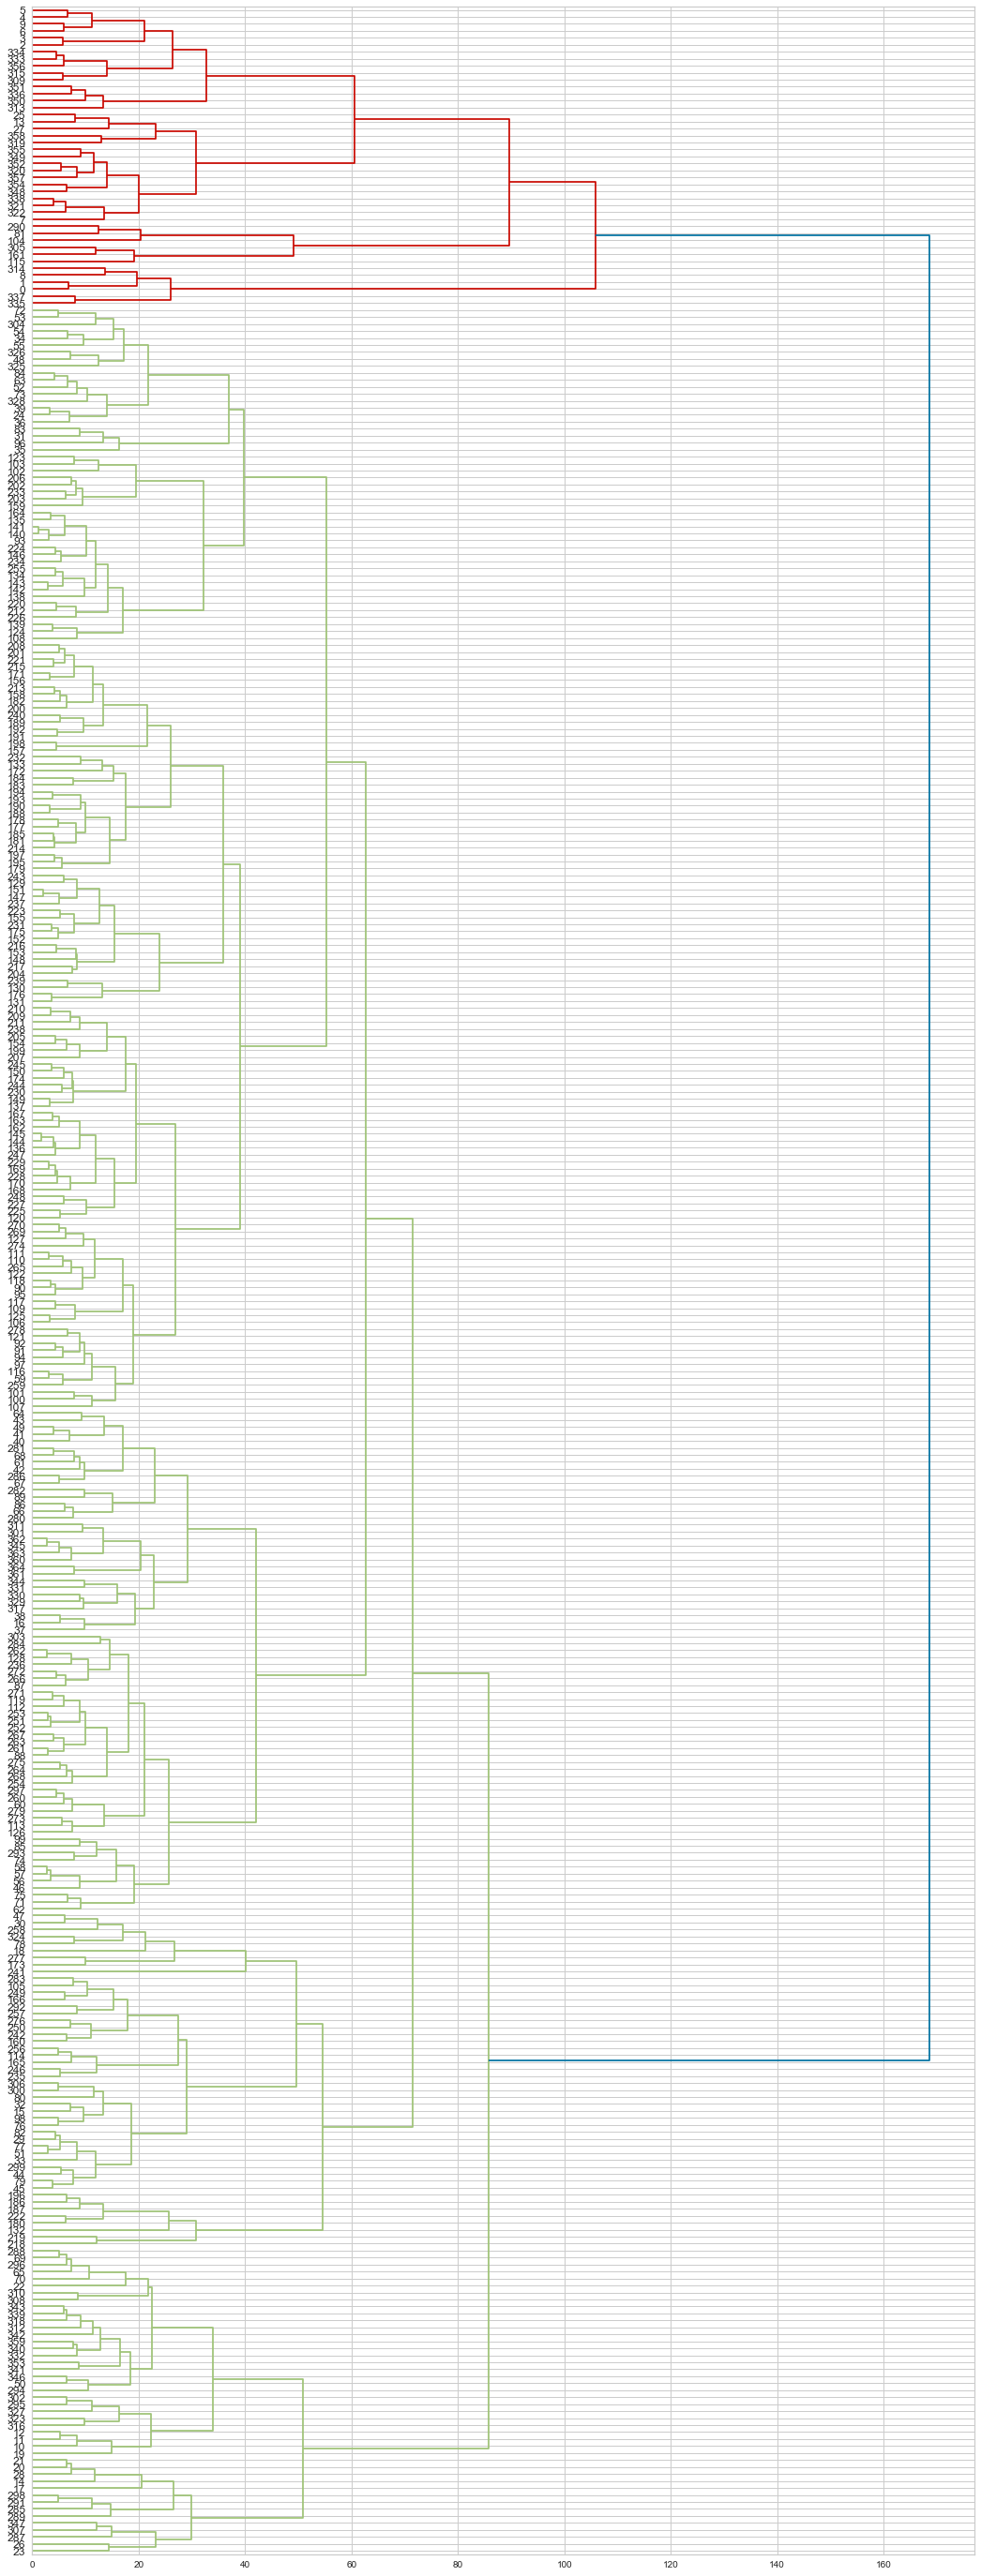

In [17]:
plt.figure(figsize=(15, 10))
dendro = hierarchy.dendrogram(h1, leaf_rotation=0, leaf_font_size=12, orientation = 'right')

# library(factoextra)
# h1 <- fviz_dend(clus_hc, k = 5, cex = 0.25, k_colors = "jco", color_labels_by_k = TRUE, rect = TRUE, rect_border = "jco", rect_fill = TRUE)

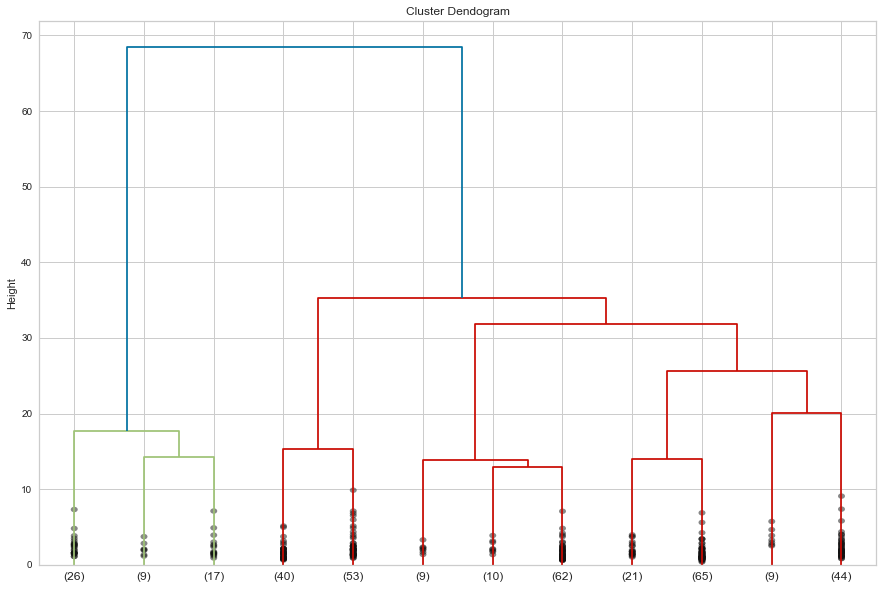

In [21]:
plt.figure(figsize=(15, 10))
plt.title('Cluster Dendogram')
plt.ylabel('Height')
dendrogram(
    hc_ward,
    truncate_mode = "lastp",
    p = 12,
    show_contracted = True
);

# distanciaT <- dist(t(dfMedidas_CLUSscale), method = "euclidean") #matriz de distancias euclídeas
# clus_hcT <- hclust(distanciaT, method="ward") 
# fviz_dend(clus_hcT)

###  Número óptimo de agrupaciones - Optimal number for grouping

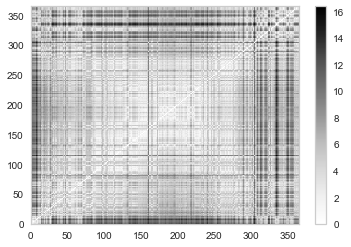

In [29]:
dist_mat = squareform(pdist(df))

N = len(df)
plt.pcolormesh(dist_mat)
plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

# fviz_dist(distancia, show_labels = FALSE)

In [53]:
pca_df = pd.DataFrame(data = df, columns = ["target"])

In [57]:
df['target'] = '0'

In [58]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

KeyError: 'principal component 1'

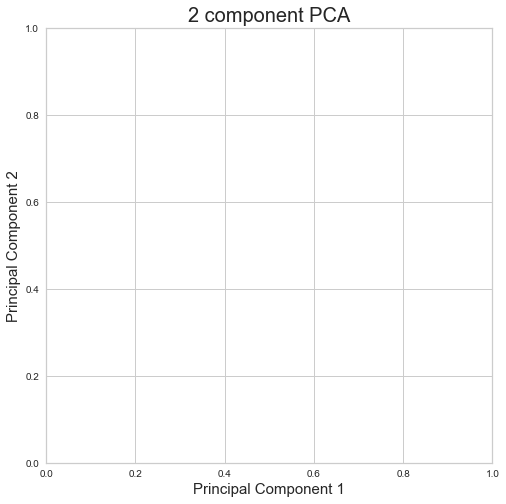

In [59]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Lluvia', 'O3']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['target'] == target
    ax.scatter(df.loc[indicesToKeep, 'principal component 1']
               , df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [69]:
# pip install pyclustertend

In [70]:
hopkins(df,150)
# get_clust_tendency(dfMedidas_CLUSscale, n = nrow(dfMedidas_CLUSscale)-1, graph = FALSE)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


0.15292840493219229

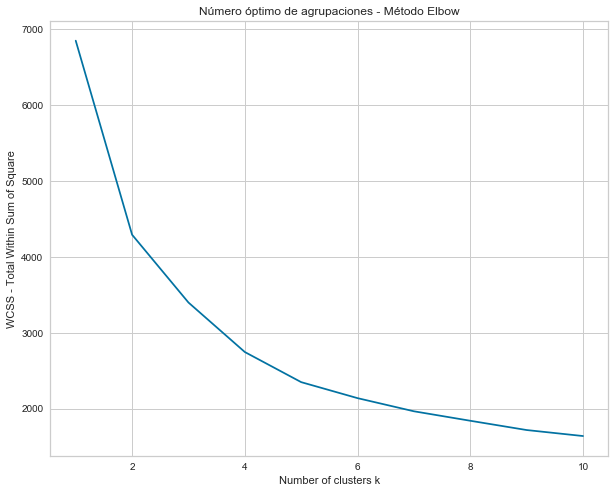

In [71]:
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Número óptimo de agrupaciones - Método Elbow')
plt.xlabel('Number of clusters k')
plt.ylabel('WCSS - Total Within Sum of Square')
plt.show()

# fviz_nbclust(dfMedidas_CLUSscale, kmeans, method = "wss") +
#   geom_vline(xintercept = 3, linetype = 2) +
#   labs(title = "Número óptimo de agrupaciones", subtitle = "Método \"Elbow\"")

In [18]:
for n_clusters in range(2, 10):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    y = clusterer.fit_predict(df)

    message = "For n_clusters = {} The average silhouette_score is: {}"
    print(message.format(n_clusters, round(silhouette_score(df, y), 2)))

For n_clusters = 2 The average silhouette_score is: 0.43
For n_clusters = 3 The average silhouette_score is: 0.24
For n_clusters = 4 The average silhouette_score is: 0.25
For n_clusters = 5 The average silhouette_score is: 0.25
For n_clusters = 6 The average silhouette_score is: 0.24
For n_clusters = 7 The average silhouette_score is: 0.22
For n_clusters = 8 The average silhouette_score is: 0.22
For n_clusters = 9 The average silhouette_score is: 0.19


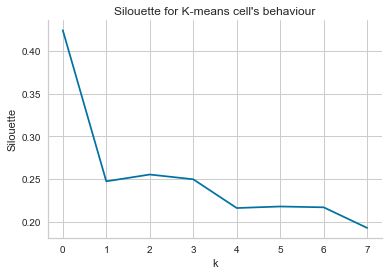

In [19]:
s = []
for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    s.append(silhouette_score(df, labels, metric='euclidean'))
plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
sns.despine()

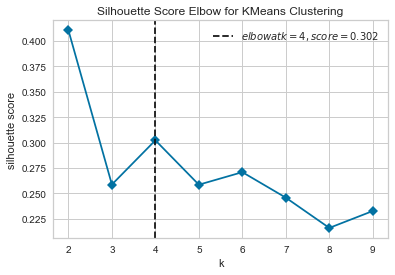

In [77]:
# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=42)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof()

# fviz_nbclust(dfMedidas_CLUSscale, kmeans, method = "silhouette") +
#  labs(title = "Número óptimo de agrupaciones", subtitle = "Método \"Silhouette\"")

In [14]:
# The Gap statistic compares the cohesion value of a cluster compared to the cohesion value of a random distribution of data.

In [86]:
def optimalK(data, nrefs=3, maxClusters=10):

    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

In [87]:
k, gapdf = optimalK(df, nrefs=5, maxClusters=10)
print('Optimal k is: ', k)

Optimal k is:  9


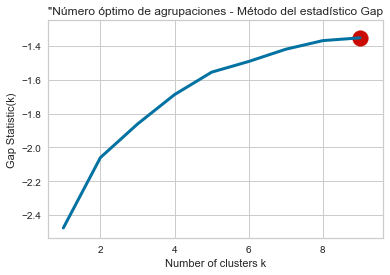

In [89]:
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Number of clusters k')
plt.ylabel('Gap Statistic(k)')
plt.title('"Número óptimo de agrupaciones - Método del estadístico Gap')
plt.show()

# set.seed(123)
# fviz_nbclust(dfMedidas_CLUSscale, kmeans, nstart = 2, method = "gap_stat", nboot = 500)+
#  labs(title = "Número óptimo de agrupaciones", subtitle = "Método del estadístico \"Gap\"")

In [ ]:
# There is no definition for NbClust in Python, but we can look for optimal number of clusters with elbow, silhouette and gap functions

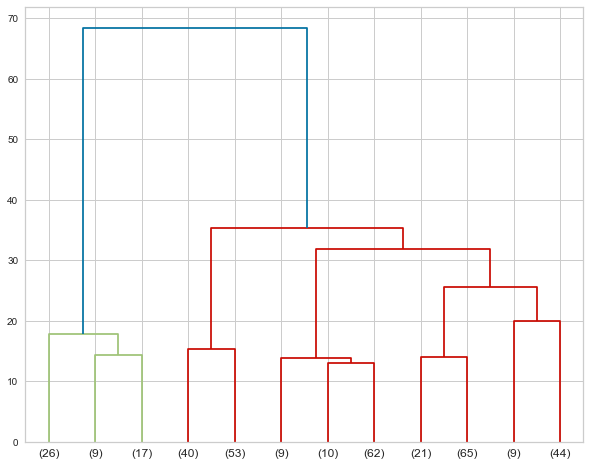

In [25]:
plt.figure(figsize=(10, 8))
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(df)

dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 12,
);

plt.show()

# res_HC <- eclust(dfMedidas_CLUSscale, "hclust", k = 2, graph = TRUE)
# fviz_dend(res_HC, palette = "jco", rect = TRUE, show_labels = FALSE)

In [100]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

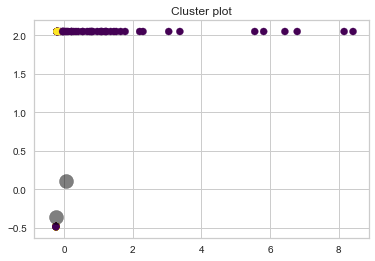

In [99]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.title('Cluster plot')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


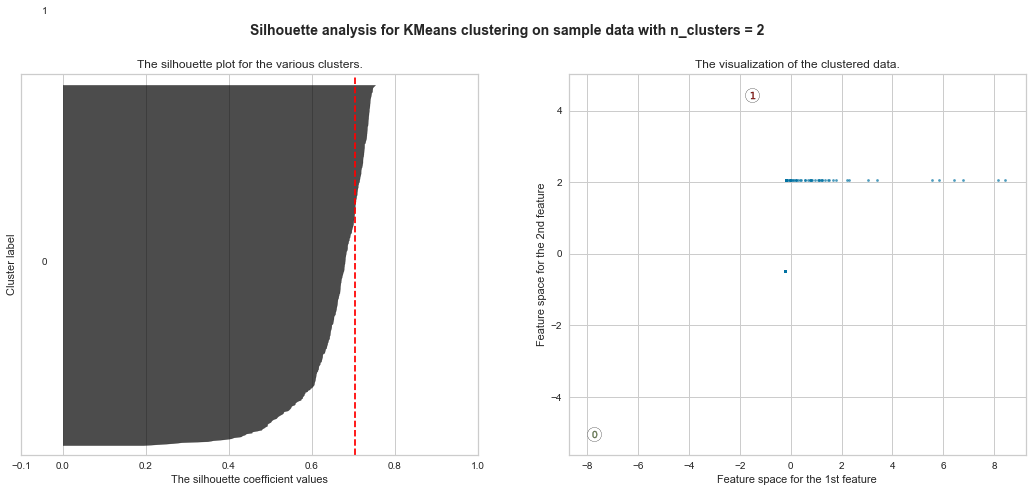

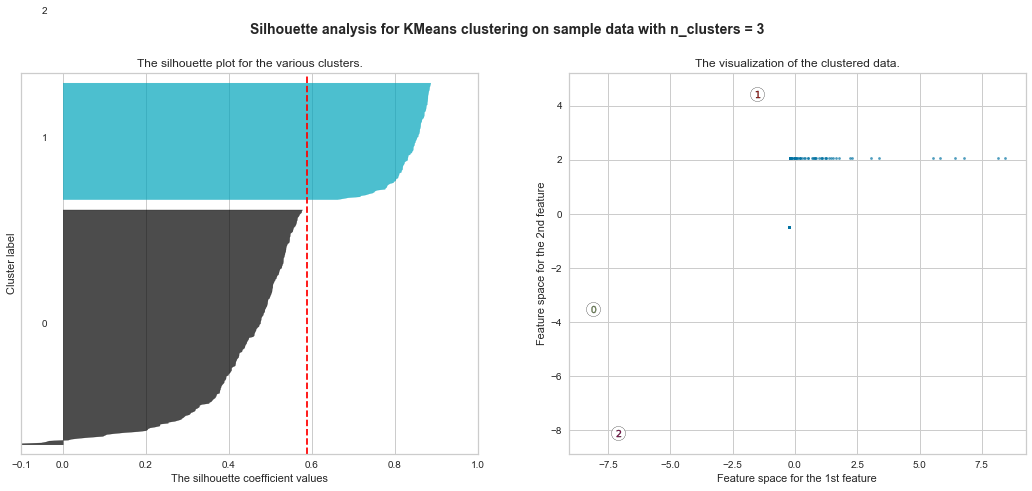

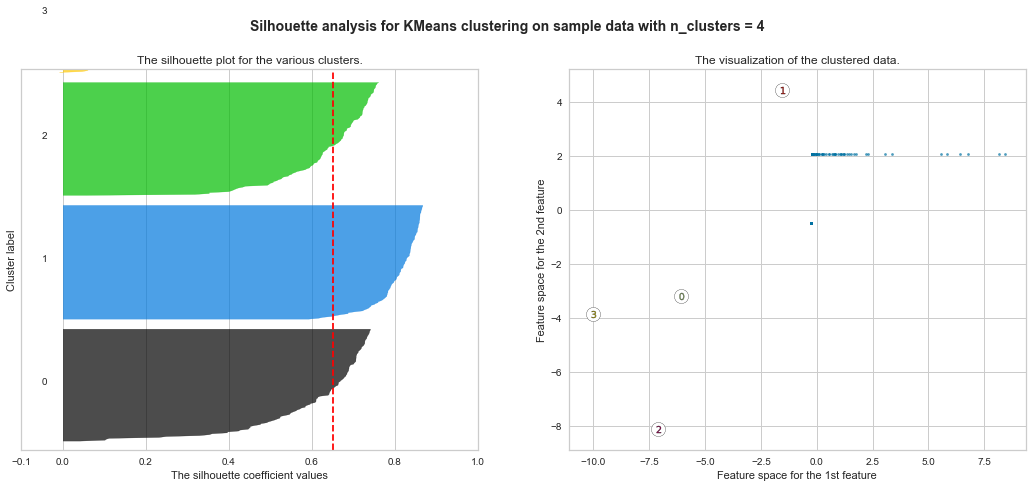

In [113]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


range_n_clusters = [2,3,4]


for n_clusters in range_n_clusters:
# Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters - 135)
    ax2.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    
    
# fviz_silhouette(res_HC, palette = "jco")

In [41]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)
clusters = k_fit.labels_
centers = kmeans.cluster_centers_

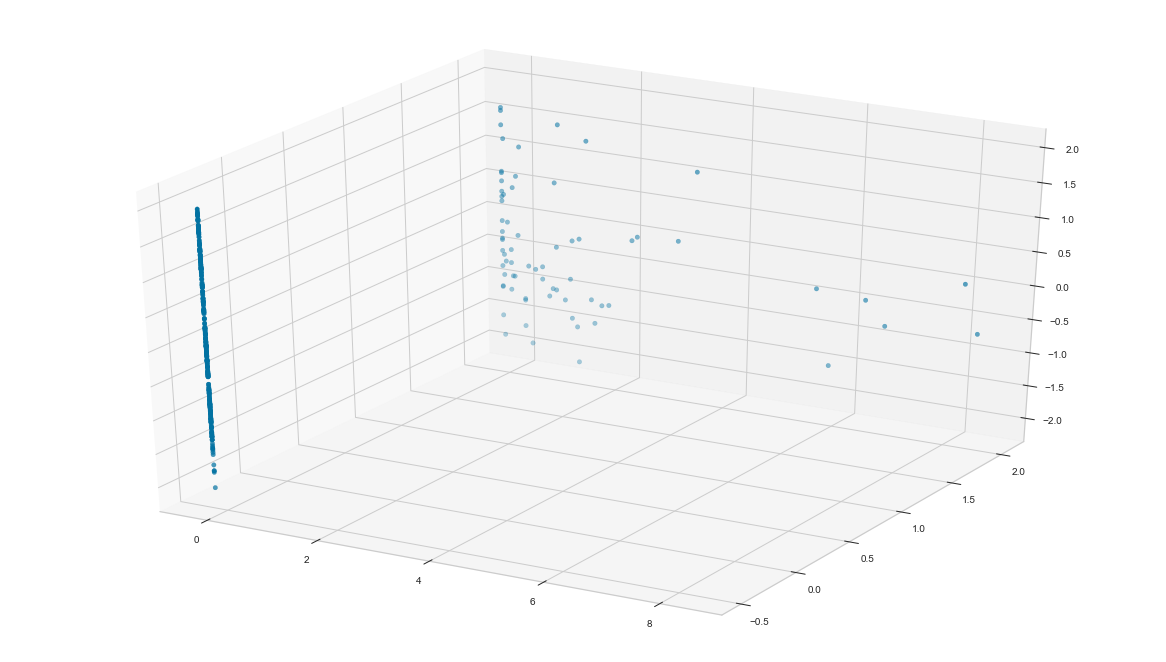

In [42]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

## Agrupamiento por Particionamiento - Partitioning Grouping

In [7]:
kmeans = KMeans(n_init = 25, n_clusters = 2)
kmeans

#set.seed(123)
#res_KM <- kmeans(dfMedidas_CLUSscale, 2, nstart = 25)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=25, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [115]:
k_fit = kmeans.fit(df)

In [116]:
k_fit.cluster_centers_
# print(res_KM$centers)

array([[ 6.72857518e-02,  1.03016784e-01,  2.17459155e-01,
         2.44000442e-01,  3.20572668e-01,  3.02287438e-01,
        -4.20803667e-01, -4.47423131e-01, -4.45845810e-01,
        -4.20945360e-01, -3.49064552e-01, -1.84358444e-01,
         3.87769813e-01, -4.08357739e-01, -4.38543665e-01,
        -4.02258330e-01, -1.88282741e-01,  1.66533454e-15,
         0.00000000e+00],
       [-2.35915475e-01, -3.61194650e-01, -7.62449381e-01,
        -8.55507721e-01, -1.12398318e+00, -1.05987200e+00,
         1.47541039e+00,  1.56874283e+00,  1.56321247e+00,
         1.47590719e+00,  1.22388065e+00,  6.46392570e-01,
        -1.35958799e+00,  1.43177281e+00,  1.53760989e+00,
         1.41038723e+00,  6.60151832e-01,  1.00000000e+00,
         0.00000000e+00]])

In [68]:
clusters = k_fit.labels_
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,

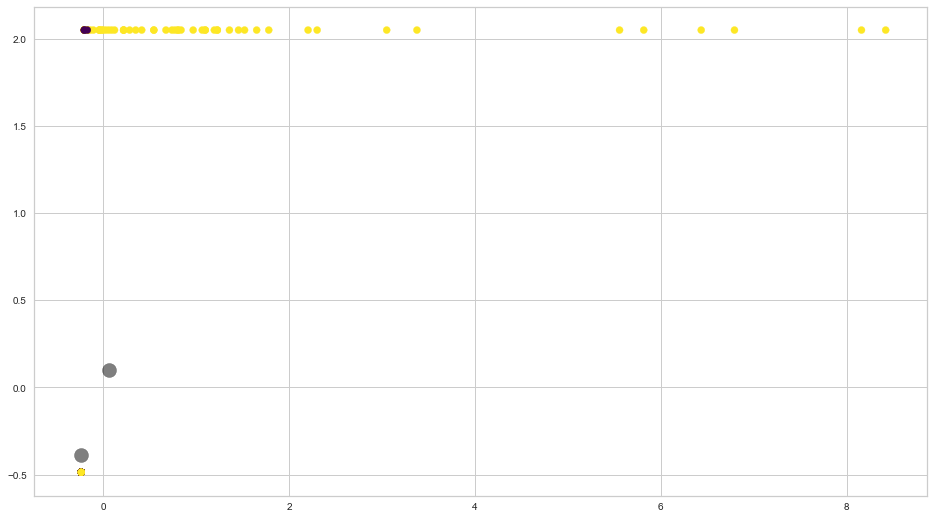

In [70]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s= 50, cmap = "viridis")

centers = k_fit.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha =0.5);

## Agrupamiento basado en modelos - Grouping based on models

In [12]:
gmm = GMM(n_components=3).fit(df)
labels = gmm.predict(df)

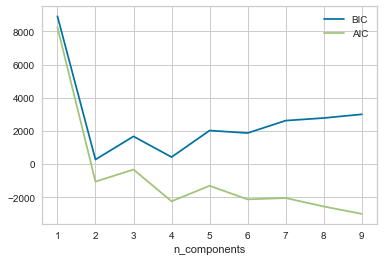

In [13]:
n_components = np.arange(1, 10)
models = [GMM(n, covariance_type='full', random_state=0).fit(df)
          for n in n_components]

plt.plot(n_components, [m.bic(df) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

# fviz_mclust(res_EM, "BIC", palette = "jco")

In [15]:
def em_gmm_orig(xs, pis, mus, sigmas, tol=0.01, max_iter=100):

    n, p = xs.shape
    k = len(pis)

    ll_old = 0
    for i in range(max_iter):
        exp_A = []
        exp_B = []
        ll_new = 0

        # E-step
        ws = np.zeros((k, n))
        for j in range(len(mus)):
            for i in range(n):
                ws[j, i] = pis[j] * mvn(mus[j], sigmas[j]).pdf(xs[i])
        ws /= ws.sum(0)

        # M-step
        pis = np.zeros(k)
        for j in range(len(mus)):
            for i in range(n):
                pis[j] += ws[j, i]
        pis /= n

        mus = np.zeros((k, p))
        for j in range(k):
            for i in range(n):
                mus[j] += ws[j, i] * xs[i]
            mus[j] /= ws[j, :].sum()

        sigmas = np.zeros((k, p, p))
        for j in range(k):
            for i in range(n):
                ys = np.reshape(xs[i]- mus[j], (2,1))
                sigmas[j] += ws[j, i] * np.dot(ys, ys.T)
            sigmas[j] /= ws[j,:].sum()

        # update complete log likelihoood
        ll_new = 0.0
        for i in range(n):
            s = 0
            for j in range(k):
                s += pis[j] * mvn(mus[j], sigmas[j]).pdf(xs[i])
            ll_new += np.log(s)

        if np.abs(ll_new - ll_old) < tol:
            break
        ll_old = ll_new

    return ll_new, pis, mus, sigmas

In [17]:
n = len(df)

# Ground truthish
_mus = np.array([[0, data.groupby('Lluvia').mean().iat[0, 0]], 
                 [data.groupby('Lluvia').mean().iat[1, 0], 0]])
_sigmas = np.array([[[5, 0], [0, 5]], 
                    [[5, 0],[0, 5]]])
_pis = np.array([0.5, 0.5]) # priors

# initial random guesses for parameters
np.random.seed(0)

pis = np.random.random(2)
pis /= pis.sum()
mus = np.random.random((2,2))
sigmas = np.array([np.eye(2)] * 2) * df.Lluvia.std()

# generate our noisy x values
xs = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n))
                    for pi, mu, sigma in zip(_pis, _mus, _sigmas)])

ll, pis, mus, sigmas = em_gmm_orig(xs, pis, mus, sigmas)

# library(mclust)
# res_EM <- Mclust(dfMedidas_CLUSscale) #Agrupamiento basado en modelos, EM
# summary(res_EM)  

In [25]:
dbscan = DBSCAN()

dbscan.fit(df)

In [31]:
dbscan = DBSCAN(eps = 2.6, min_samples = 5)
db = dbscan.fit(df)
# res_DBSCAN <- fpc::dbscan(dfMedidas_CLUSscale, eps = 2.6, MinPts = 5)

In [32]:
print(dbscan)
# print(res_DBSCAN)

DBSCAN(algorithm='auto', eps=2.6, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)


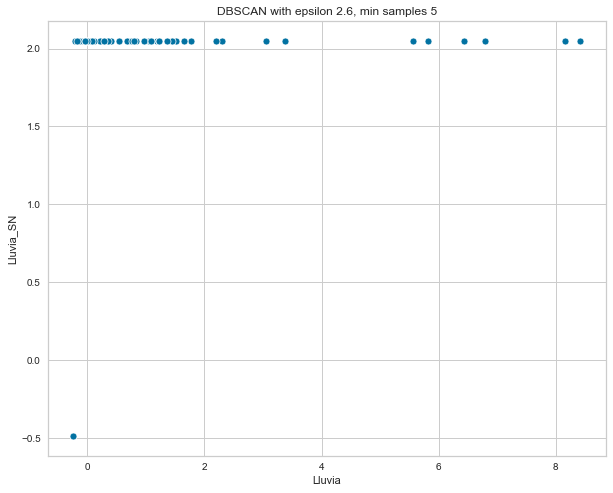

In [35]:
plt.figure(figsize=(10, 8))
sns.scatterplot(df['Lluvia'], df['Lluvia_SN'],
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 2.6, min samples 5')
plt.show()

# fviz_cluster(res_DBSCAN, data = dfMedidas_CLUSscale, ellipse = TRUE, geom = "point",palette = "jco")

In [37]:
# from sklearn.cluster import OPTICS, cluster_optics_dbscan

In [ ]:
clust = OPTICS(eps = 2.6, min_samples=5)
clust.fit(X)

# res_OPTICS <- optics(dfMedidas_CLUSscale, eps = 2.6, minPts = 5)
# print(res_OPTICS)

##  Agrupamiento borroso - Fuzzy

In [42]:
fcm = FCM(n_clusters=2)
fcm.fit(df)

## PCA - Principal Component Analysis

In [7]:
pca = PCA(n_components = 3)
pca_fit = pca.fit_transform(df)

In [8]:
component_df = pd.DataFrame(data = pca_fit, columns = ["first_component","second_component","third_component"])

In [9]:
component_df.head()

,first_component,second_component,third_component
0,9.013495,0.164508,0.304356
1,9.469581,-0.385110,-0.108726
2,7.840527,-0.634508,-0.302321
3,7.892662,-0.626770,-0.480905
4,6.910448,-0.690783,-0.271703


In [11]:
pca.explained_variance_ratio_

array([0.5524003, 0.1512167, 0.0794367])

In [12]:
pca = PCA().fit(df)
#without componenets

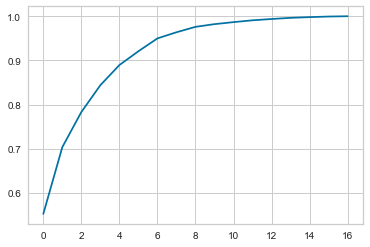

In [14]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
# a graph to decide the number of components
# with 6 components we can explain variability 95%

## Otras técnicas de agrupamiento

## Representación y análisis de las clases

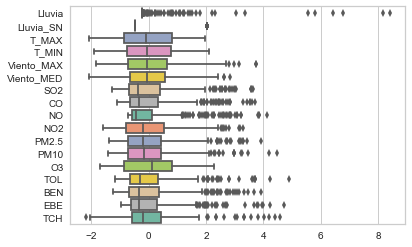

In [9]:
 ax = sns.boxplot(data=df, orient="h", palette="Set2")

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:513: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\contour.py:1557: UserWarning: 

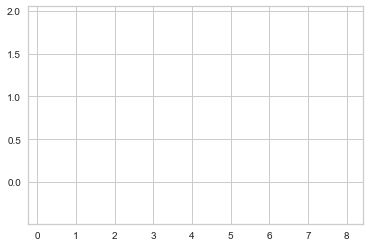

In [10]:
sns.kdeplot(df, shade=True)

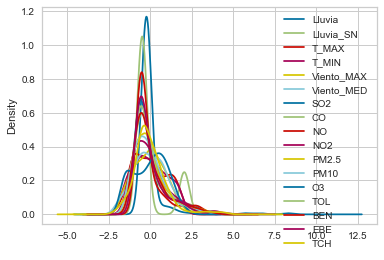

In [11]:
ax = df.plot.kde()

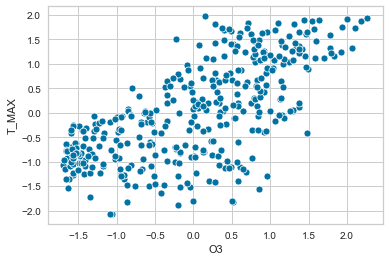

In [32]:
ax = sns.scatterplot(x=df.O3, y=df.T_MAX, data=df)

## Spectral Clustering

In [22]:
# affinity = ‘rbf’
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')
labels_rbf = spectral_model_rbf.fit_predict(df)

In [23]:
# affinity = ‘nearest_neighbors’
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') 
  
# Training the model and Storing the predicted cluster labels 
labels_nn = spectral_model_nn.fit_predict(df) 